In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [97]:
dfB = pd.read_csv("B2Measurements.txt", delimiter=';', encoding='utf-16')
dfB = dfB[['X', 'Y', 'Z']]
#dfB.head()

In [98]:
files = ["ZuidgorsA1.txt", "ZuidgorsA2.txt", "ZuidgorsA3.txt"]

dfA = pd.concat([
    pd.read_csv(
        file,
        delim_whitespace=True,
        header=None,
        names=["Name", "Date", "Time", "X", "Y", "Z", "H_Error", "V_Error"],
        comment='R',
        skip_blank_lines=True
    ) for file in files
], ignore_index=True)

dfA=dfA[['X', 'Y', 'Z']].copy()
#dfA.head()

/var/folders/4g/4l1db1z56738fh2tphfmhjhc0000gn/T/ipykernel_90608/2504319659.py:4: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  pd.read_csv(
/var/folders/4g/4l1db1z56738fh2tphfmhjhc0000gn/T/ipykernel_90608/2504319659.py:4: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  pd.read_csv(
/var/folders/4g/4l1db1z56738fh2tphfmhjhc0000gn/T/ipykernel_90608/2504319659.py:4: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  pd.read_csv(


In [99]:
df = pd.concat([dfA, dfB], ignore_index=True)
df.head()

,X,Y,Z
0,45833.333,378590.513,1.684
1,45836.668,378583.429,1.561
2,45840.695,378574.977,1.767
3,45840.845,378575.009,1.808
4,45849.224,378561.819,1.845


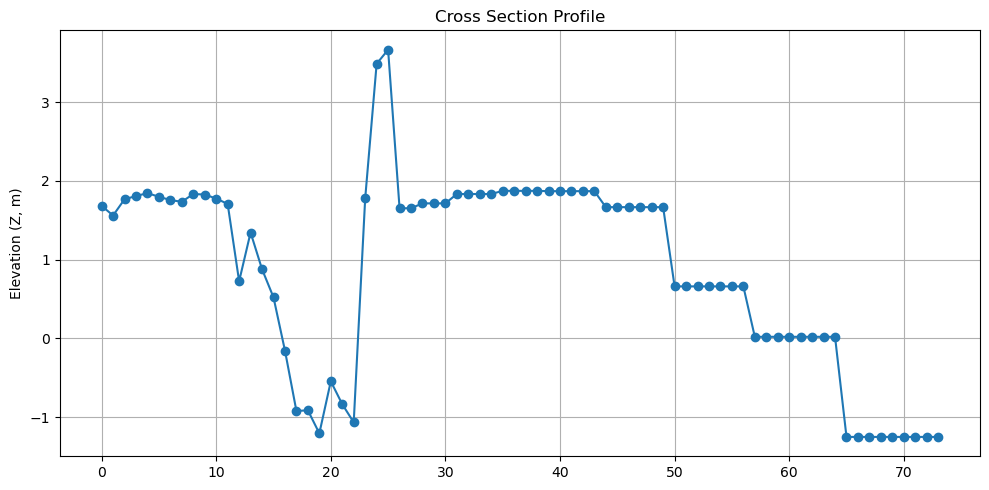

In [100]:
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['Z'], marker='o', linestyle='-')
plt.ylabel('Elevation (Z, m)')
plt.title('Cross Section Profile')
plt.grid(True)
plt.tight_layout()
plt.show()


In [101]:
# Compute cumulative distance along transect
dx = np.diff(df['X'])
dy = np.diff(df['Y'])
distances = np.sqrt(dx**2 + dy**2)
distances = np.insert(distances, 0, 0)
df['Length'] = np.cumsum(distances)
df['Length']

0       0.000000
1       7.829769
2      17.192089
3      17.345464
4      32.971844
         ...    
69    521.828942
70    521.828942
71    521.828942
72    521.828942
73    521.828942
Name: Length, Length: 74, dtype: float64

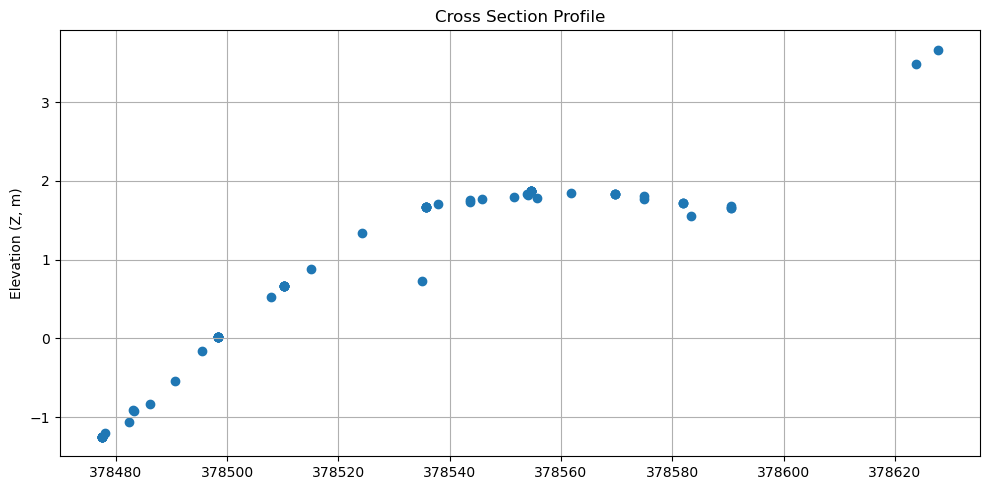

In [102]:
plt.figure(figsize=(10, 5))
plt.scatter(df['Y'], df['Z'], marker='o')
plt.ylabel('Elevation (Z, m)')
plt.title('Cross Section Profile')
plt.grid(True)
plt.tight_layout()
plt.show()

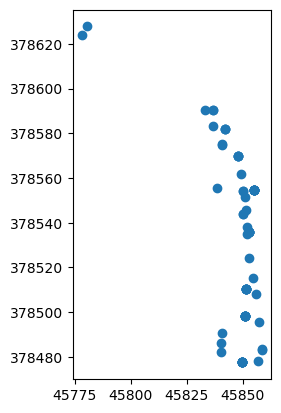

In [103]:
plt.scatter(df['X'],df['Y'])
a=plt.gca()
a.set_aspect('equal')

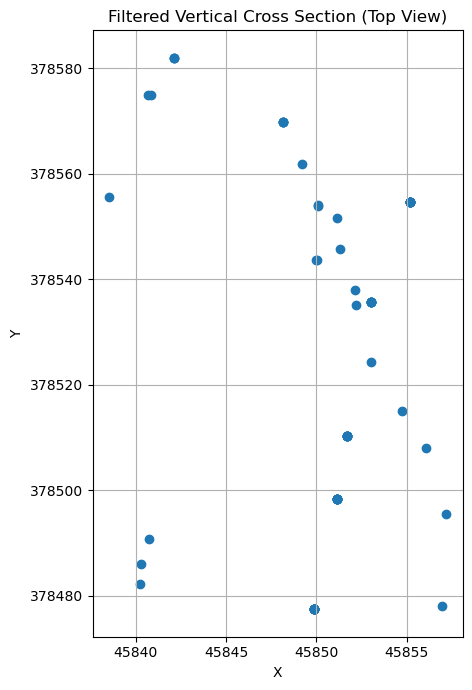

2      17.192089
3      17.345464
4      32.971844
5      43.445405
6      51.324228
         ...    
69    521.828942
70    521.828942
71    521.828942
72    521.828942
73    521.828942
Name: Length, Length: 66, dtype: float64

In [104]:

x_center = df['X'].median()

# max deviation from the centerline
dev = 30
filtered_df = df[(df['X'] - x_center).abs() <= dev]


x_std = df['X'].std()
filtered_df =df[(df['X'] - df['X'].mean()).abs() < 0.75 * x_std]

plt.figure(figsize=(5, 7))
plt.scatter(filtered_df['X'], filtered_df['Y'])
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Filtered Vertical Cross Section (Top View)")
plt.grid(True)
plt.tight_layout()
plt.show()

filtered_df.Length

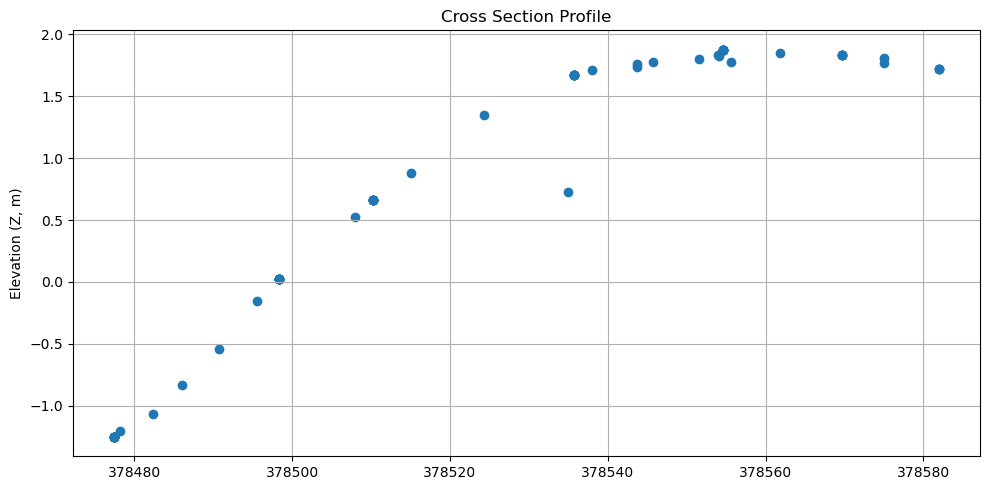

In [105]:
plt.figure(figsize=(10, 5))
plt.scatter(filtered_df['Y'], filtered_df['Z'], marker='o')
plt.ylabel('Elevation (Z, m)')
plt.title('Cross Section Profile')
plt.grid(True)
plt.tight_layout()
plt.show()